## Creating word vectors with Word2Vec 

#### Load dependencies

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

C:\Users\Sarfraz\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarfraz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Sarfraz\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg

In [7]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
len(gutenberg.fileids())

18

#### Tokenize text 

In [9]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [10]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [11]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [12]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [13]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [14]:
gberg_sents = gutenberg.sents()

In [15]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [16]:
gberg_sents[4][14]

'father'

In [17]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [18]:
len(gutenberg.words())

2621613

#### Run word2vec

In [19]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=4)

In [20]:
model.save('raw_gutenberg_model.w2v')

#### Explore model

In [19]:
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [24]:
model['dog']

array([-0.24174112, -0.3714409 ,  0.28364563, -0.4846018 , -0.14635783,
       -0.42109597, -0.05270863, -0.16579595, -0.08899533,  0.19692175,
        0.3103433 ,  0.50299114,  0.06442989,  0.11527099,  0.03004986,
        0.46634525,  0.7313861 ,  0.44140548, -0.0380099 , -0.23692884,
       -0.20285898,  0.13898832,  0.29985645, -0.2837115 ,  0.00867304,
        0.17689946,  0.23520197, -0.20702673,  0.487945  , -0.4076979 ,
        0.1129121 ,  0.72153217,  0.11834583, -0.11658525,  0.3687622 ,
       -0.2816805 ,  0.17389344,  0.07593086, -0.3781704 , -0.34522134,
       -0.03396583, -0.18101482, -0.02456537, -0.0388361 ,  0.2710529 ,
       -0.34312528, -0.47133407, -0.06435233, -0.30243194, -0.40406796,
        0.22559054,  0.0879605 ,  0.28500518, -0.01560392,  0.2885637 ,
        0.25990456,  0.05898946,  0.18545443,  0.3278706 , -0.5198978 ,
       -0.19489358,  0.02480107,  0.00247211,  0.1454471 ], dtype=float32)

In [21]:
len(model['dog'])

64

In [22]:
model.most_similar('dog')

[('puppy', 0.8181186318397522),
 ('sweeper', 0.7733829617500305),
 ('thief', 0.7711234092712402),
 ('cage', 0.763511598110199),
 ('pet', 0.7558975219726562),
 ('shell', 0.7510361671447754),
 ('pig', 0.7422077655792236),
 ('cow', 0.736871600151062),
 ('eel', 0.736084520816803),
 ('string', 0.7303255796432495)]

In [23]:
model.most_similar('day')

[('morning', 0.7957662343978882),
 ('night', 0.7308654189109802),
 ('evening', 0.7171804904937744),
 ('month', 0.706039309501648),
 ('time', 0.7058103680610657),
 ('week', 0.6969587206840515),
 ('feasting', 0.6864566802978516),
 ('sabbath', 0.6856037974357605),
 ('morrow', 0.6812769174575806),
 ('fourteenth', 0.6765046119689941)]

In [24]:
model.most_similar('father')

[('mother', 0.870705246925354),
 ('brother', 0.8529751300811768),
 ('sister', 0.7940049767494202),
 ('Amnon', 0.7811281681060791),
 ('wife', 0.7722023725509644),
 ('daughter', 0.7661237716674805),
 ('bondwoman', 0.7398005723953247),
 ('uncle', 0.7356903553009033),
 ('concubine', 0.7353967428207397),
 ('Tamar', 0.7164304256439209)]

In [25]:
model.doesnt_match("mother father daughter dog".split())

'dog'

In [26]:
model.similarity('father', 'dog')

0.45776868

In [27]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

[('mother', 0.7868325710296631),
 ('sister', 0.7802914381027222),
 ('daughter', 0.7486163377761841),
 ('wife', 0.7463086843490601),
 ('husband', 0.7314435243606567),
 ('brother', 0.731423020362854),
 ('Sarah', 0.7143012285232544),
 ('Sarai', 0.7118659019470215),
 ('Rachel', 0.6840837001800537),
 ('conceived', 0.6805933713912964)]

#### Reduce word vector dimensionality with t-SNE

In [28]:
len(model.wv.vocab)

17011

In [32]:
X = model[model.wv.vocab]

In [35]:
tsne = TSNE(n_components=2, n_iter=250)

In [36]:
X_2d = tsne.fit_transform(X)

In [37]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [38]:
coords_df.head()

,x,y,token
0,-0.048041,0.643951,[
1,0.291694,0.742353,Emma
2,0.346398,-0.202482,by
3,0.284219,0.762512,Jane
4,-0.068143,0.632286,]


In [39]:
coords_df.to_csv('raw_gutenberg_model.w2venberg_tsne.csv', index=False)

#### Visualize 2D representation of word vectors

In [40]:
coords_dfds_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [41]:
coords_df.head()

,x,y,token
0,-0.048041,0.643951,[
1,0.291694,0.742353,Emma
2,0.346398,-0.202482,by
3,0.284219,0.762512,Jane
4,-0.068143,0.632286,]


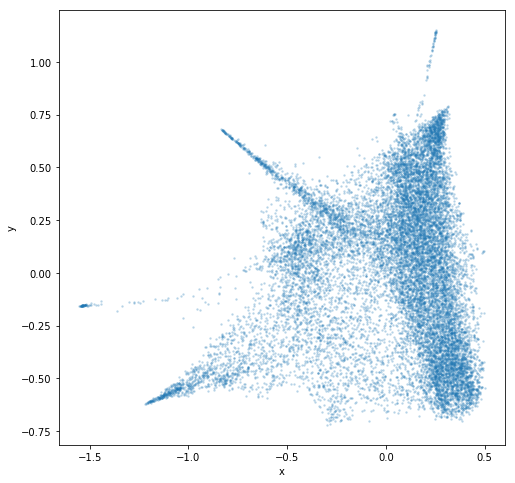

In [42]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8, 8), marker='.', s=10, alpha=0.2)

In [43]:
output_notebook()

Loading BokehJS ...

In [44]:
subset_df = coords_df.sample(n=5000)

In [45]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [46]:
show(p)